In [106]:
import pandas as pd
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import numpy as np

In [108]:
true_vals_df = pd.read_csv('true_vals.csv')
bert_result_df = pd.read_csv('bert_sep_3_1e-5_epoch_200_predicted_vals.csv')
roberta_result_df = pd.read_csv('roberta_sep_32_2e-5_epoch_200_predicted_vals.csv')
cwbert_result_df = pd.read_csv('cwbert_epoch_200_predicted_vals.csv')
true_vals = list(true_vals_df['0'])
bert_result = list(bert_result_df['0'])
roberta_result = list(roberta_result_df['0'])
cwbert_result = list(cwbert_result_df['0'])

In [32]:
print(true_vals)

[3.3499999046325684, 5.849999904632568, 3.799999952316284, 3.549999952316284, 5.75, 3.799999952316284, 5.400000095367432, 3.849999904632568, 5.0, 4.099999904632568, 2.0, 4.349999904632568, 3.3499999046325684, 2.8499999046325684, 4.900000095367432, 4.199999809265137, 3.049999952316284, 3.849999904632568, 4.75, 3.799999952316284, 3.700000047683716, 4.25, 2.3499999046325684, 5.099999904632568, 3.299999952316284, 4.349999904632568, 4.300000190734863, 5.300000190734863, 5.900000095367432, 5.400000095367432, 2.950000047683716, 2.0, 3.25, 4.449999809265137, 3.700000047683716, 4.449999809265137, 3.700000047683716, 5.050000190734863, 2.700000047683716, 6.150000095367432, 4.150000095367432, 2.0999999046325684, 4.199999809265137, 4.449999809265137, 3.5999999046325684, 5.0, 5.449999809265137, 4.25, 5.550000190734863, 5.849999904632568, 6.050000190734863, 5.099999904632568, 5.349999904632568, 4.349999904632568, 3.299999952316284, 3.900000095367432, 6.150000095367432, 5.199999809265137, 5.5999999046

In [33]:
print(bert_result)

[5.1105943, 5.460523, 4.737376, 4.633655, 4.7017508, 4.6331067, 4.586859, 4.590859, 5.03736, 4.4578576, 4.1557155, 4.2687993, 4.5361795, 4.793145, 4.5954432, 4.8954153, 4.482537, 4.437657, 4.299408, 4.694804, 4.425661, 4.7569914, 4.6997824, 4.3502755, 4.310936, 4.1764226, 4.294272, 4.300433, 4.578199, 4.325065, 4.2179055, 4.292654, 4.300476, 4.8345737, 4.3442664, 4.381939, 4.7935653, 4.279889, 4.223293, 4.602777, 4.455355, 4.255908, 4.391873, 4.650676, 4.773479, 4.3408003, 4.8472676, 4.5051427, 4.2884316, 4.9468274, 4.5079775, 4.5960326, 4.285484, 4.6867847, 4.2713223, 4.897131, 4.428845, 4.587707, 4.7876234, 4.3540664, 4.274108, 4.381366, 4.4689364, 4.747382, 4.4116936, 4.3824124, 4.418245, 4.876871, 4.3337517, 4.6287985, 4.1094756, 4.000366, 3.9083626, 4.8732142, 4.235293, 4.529748, 4.427127, 4.432798, 3.9354818, 4.2607617, 4.4063697, 4.419253, 4.5747485, 3.9528239, 3.9428785, 4.606726, 4.5975614, 4.417526, 4.178608, 4.773371, 4.482577, 4.8167076, 5.0504427, 4.499249, 4.240703, 4.413

In [26]:
def scatter_plot(x, y, xlabel, ylabel, line=True):

    fig, ax = plt.subplots(figsize=(10,10))

    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes('right', size='5%', pad=0.05)

    # fig = plt.figure(figsize=(12,10))
    plt.xlim(min(x), max(x)+1)
    plt.ylim(min(y), max(y)+1)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    plt.xlabel(xlabel, fontsize=32)
    plt.ylabel(ylabel, fontsize=32)

    ax.scatter(x, y, color='blue')
    ax.tick_params(axis='both', which='major', labelsize=32)
    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    
    
    if line:
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]

        # now plot both limits against eachother
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        ax.set_aspect('equal')
        ax.set_xlim(lims)
        ax.set_ylim(lims)
    
    plt.show()
    # filename = "tsne_log.eps"
    # plt.savefig(f"../tsne/eps/{filename}", bbox_inches='tight', format='eps')

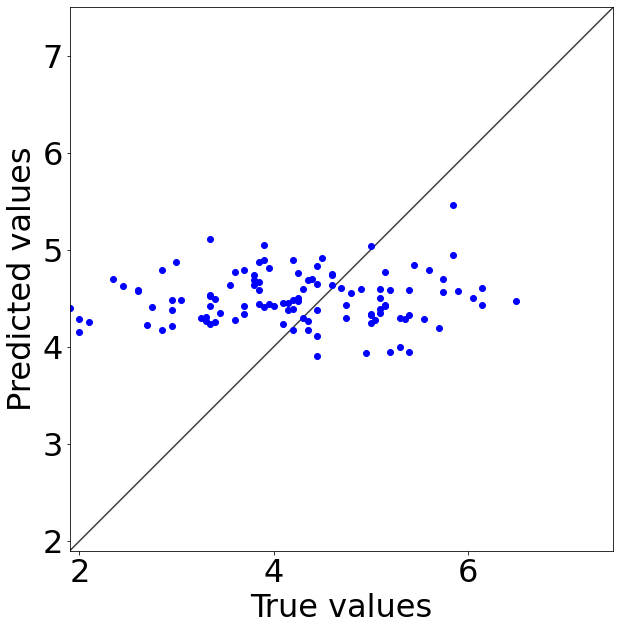

In [27]:
scatter_plot(true_vals, bert_result, 'True values', 'Predicted values')

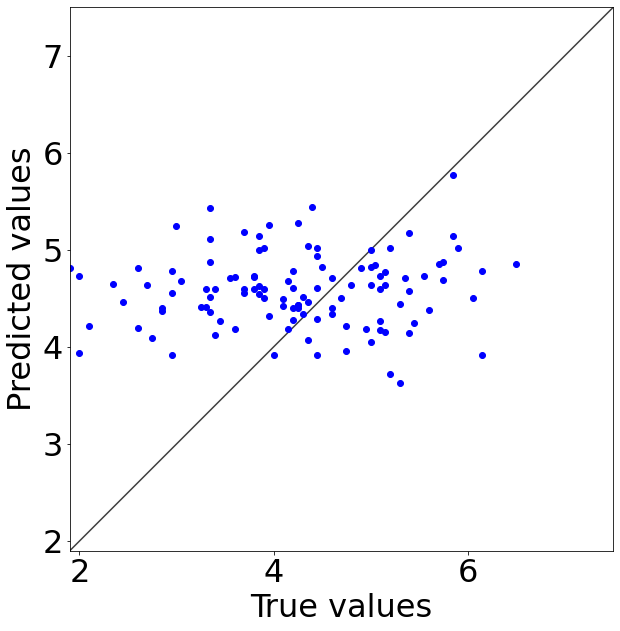

In [28]:
scatter_plot(true_vals, roberta_result, 'True values', 'Predicted values')

In [110]:
def boxplot(result_list, title, xlabel, ylabel, xlist, xticks_fontsize, yticks_fontsize, median_color='#ff7f0e', log_scale=False):
    if median_color == 'black':
        title = title + '_median_black'
    
    if not log_scale:
        title += '_linear'
    
        
    filename = title + '.eps'
    
    plt.rcParams['figure.figsize'] = [30, 20]

    plt.boxplot(result_list, showfliers=False, boxprops= dict(linewidth=10, color='black'),
               whiskerprops=dict(linestyle='-',linewidth=10, color='black'),
               capprops=dict(linewidth=10), medianprops=dict(linewidth=10, color=median_color))
    
    # plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=20)
    plt.xticks(xlist, xlabel, fontsize=xticks_fontsize)
    plt.yticks(fontsize=yticks_fontsize)
    # plt.ylabel(ylabel, fontsize=40)
    
    if log_scale:
        plt.yscale('log')
    # plt.title(title, fontsize=30)
    
    # plt.savefig(f"../figure/eps/{filename}", format='eps', bbox_inches='tight')
    
    # plt.show()

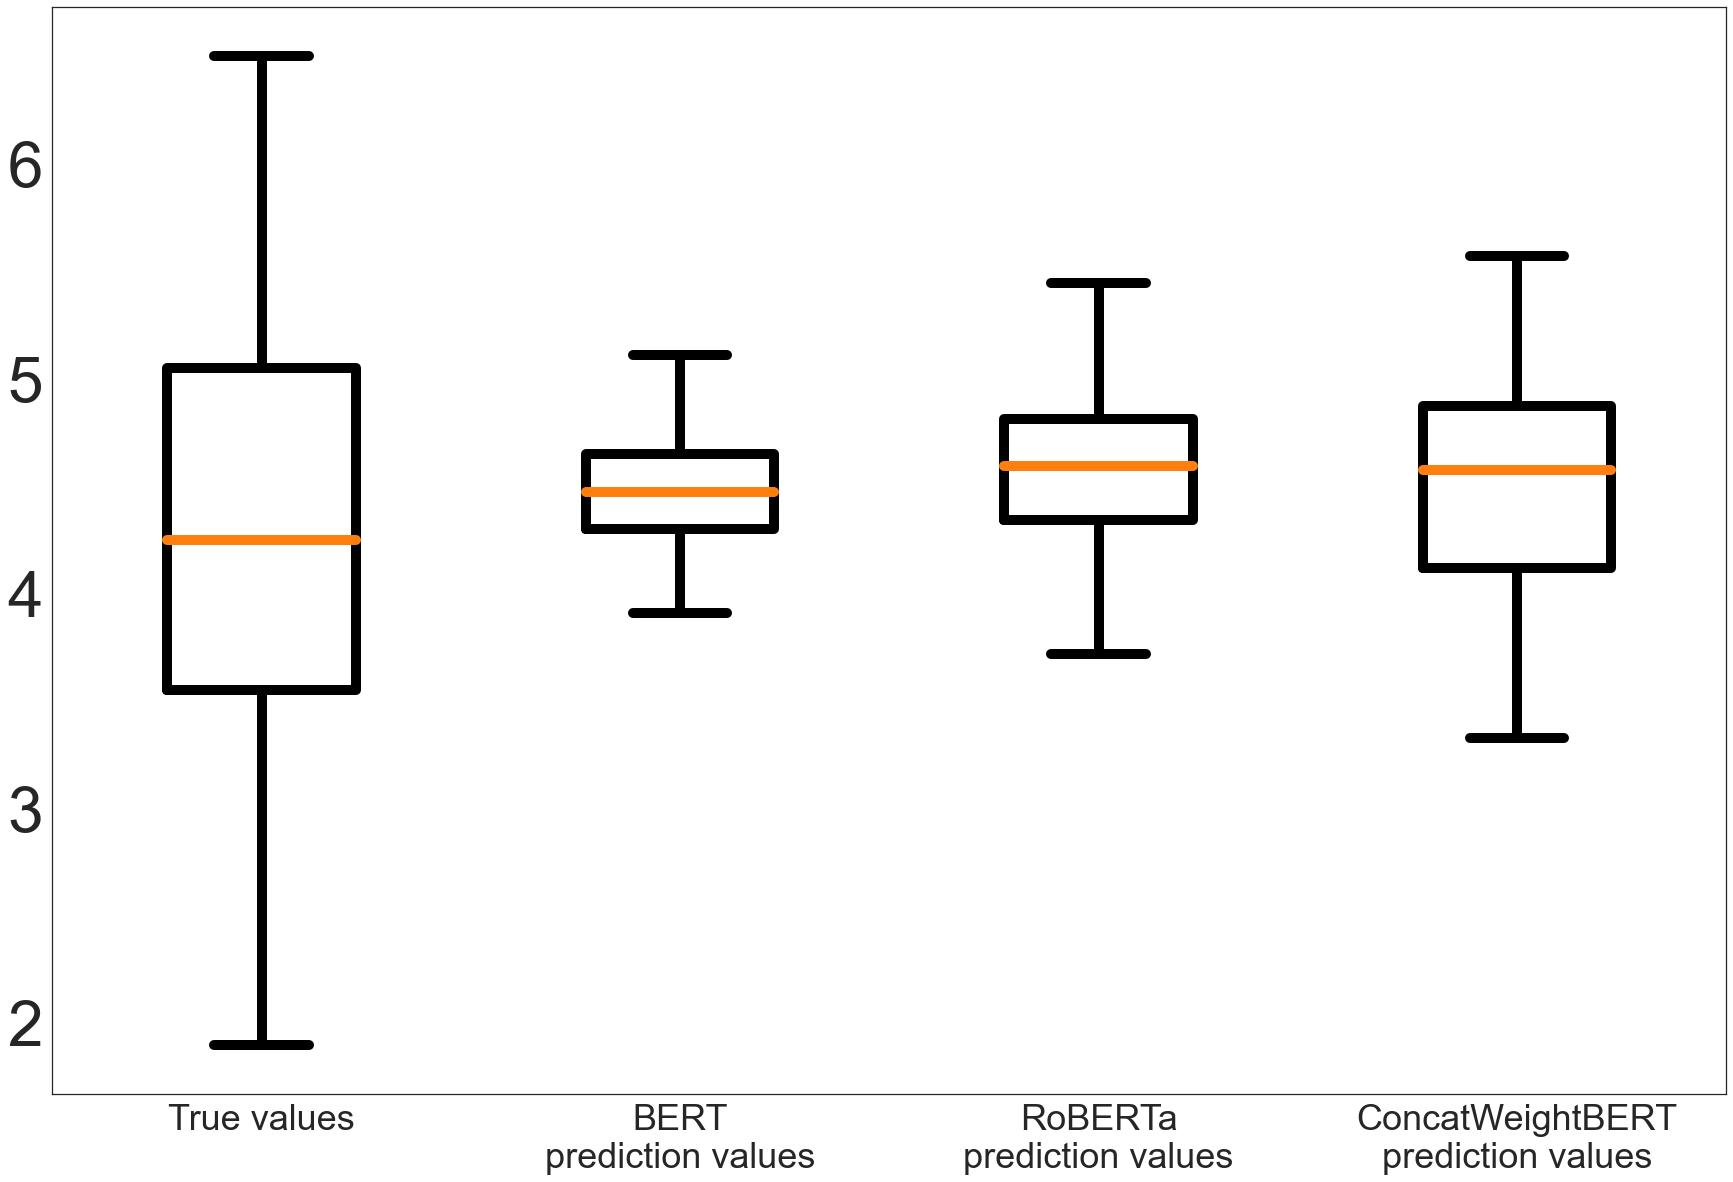

In [112]:
result_list = [true_vals, bert_result, roberta_result, cwbert_result]
xlabel = [f"True values", f"BERT\nprediction values", f"RoBERTa\nprediction values", f"ConcatWeightBERT\nprediction values"]
boxplot(result_list, '', xlabel, '', [1, 2, 3, 4], 36, 64)

In [20]:
from sklearn.manifold import TSNE

In [9]:
pooled_outputs_df = pd.read_csv('epoch_200_pooled_outputs.csv')


In [16]:
pooled_outputs_df.drop(columns = pooled_outputs_df.columns[0], axis = 1, inplace= True)

In [17]:
pooled_outputs_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.383469,-0.406873,0.225233,-0.374642,-0.645134,-0.789996,-0.423035,0.623932,-0.490352,-0.978004,...,-0.532957,0.085799,0.796122,-0.525803,0.909795,-0.063156,0.150759,-0.175684,-0.261791,-0.242624
1,0.410431,-0.497491,0.097024,-0.288761,-0.629694,-0.852061,-0.271183,0.681801,-0.720738,-0.983896,...,-0.567808,-0.016388,0.890753,-0.570694,0.916193,-0.274261,0.312642,-0.483590,-0.316891,-0.273936
2,0.295345,-0.439861,0.082396,-0.285477,-0.577375,-0.789922,-0.317481,0.627777,-0.629631,-0.988923,...,-0.512545,0.013613,0.846107,-0.554035,0.914830,-0.230510,0.166431,-0.237938,-0.297428,-0.307512
3,0.327135,-0.422880,0.028528,-0.356115,-0.643366,-0.799721,-0.380502,0.648212,-0.615536,-0.972576,...,-0.514307,0.090960,0.851133,-0.600495,0.932489,-0.262959,0.128766,-0.370192,-0.265407,-0.320914
4,0.343794,-0.451043,0.031085,-0.337576,-0.574003,-0.792422,-0.425789,0.643258,-0.617200,-0.979567,...,-0.556267,0.201393,0.827100,-0.523316,0.918450,-0.283562,0.112020,-0.404953,-0.287605,-0.362111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.255053,-0.431786,-0.024186,-0.288867,-0.539568,-0.788610,-0.348536,0.634263,-0.579661,-0.988858,...,-0.502023,0.067069,0.831772,-0.510856,0.929556,-0.225093,0.126758,-0.276112,-0.317270,-0.228164
109,0.288954,-0.458741,-0.077122,-0.343541,-0.543363,-0.763760,-0.305683,0.615267,-0.612170,-0.991828,...,-0.514977,-0.044744,0.883905,-0.536087,0.907920,-0.210775,0.111512,-0.350884,-0.273430,-0.260168
110,0.201275,-0.410449,0.127251,-0.350736,-0.599699,-0.783975,-0.413969,0.629687,-0.548579,-0.985113,...,-0.545597,0.135689,0.839410,-0.504176,0.914869,-0.221854,0.021972,-0.195442,-0.296225,-0.333776
111,0.240225,-0.418938,-0.056471,-0.241964,-0.532550,-0.763383,-0.231852,0.621107,-0.581262,-0.990195,...,-0.475566,0.138497,0.831423,-0.489683,0.932025,-0.234925,0.059002,-0.294298,-0.267231,-0.227682


In [22]:
data = np.array(pooled_outputs_df)
print(data)

[[ 0.38346937 -0.40687332  0.22523342 ... -0.17568424 -0.26179054
  -0.24262443]
 [ 0.41043055 -0.49749061  0.09702427 ... -0.48358992 -0.31689078
  -0.2739363 ]
 [ 0.29534462 -0.43986127  0.08239581 ... -0.23793834 -0.29742762
  -0.30751193]
 ...
 [ 0.20127523 -0.41044918  0.12725054 ... -0.1954422  -0.29622492
  -0.33377644]
 [ 0.24022482 -0.41893843 -0.05647102 ... -0.29429841 -0.26723075
  -0.22768208]
 [ 0.29289803 -0.46108115 -0.12551253 ... -0.40957549 -0.29392919
  -0.26402828]]


In [21]:
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

[[-6.5995827  -0.8026504 ]
 [ 2.1494038  -4.974682  ]
 [ 0.49848977 -2.2267742 ]
 [-0.3416478  -3.9378412 ]
 [-0.78206617 -3.4129124 ]
 [-6.1779313  -1.570641  ]
 [-4.0282464  -0.6566853 ]
 [-4.847084   -0.7134353 ]
 [-7.2130938  -0.9418354 ]
 [ 4.2318497   2.4702456 ]
 [ 0.12541126 -1.5447762 ]
 [-4.231953   -0.5739193 ]
 [ 2.5740092   3.9624217 ]
 [ 0.3165841   7.0449877 ]
 [-2.1095386  -1.5306226 ]
 [ 0.9860814  -2.2402365 ]
 [ 0.32314974  6.2818007 ]
 [-3.0729969  -3.4558165 ]
 [-2.1104605   0.62430936]
 [-0.9389473  -2.4811828 ]
 [ 1.9436219   1.4377989 ]
 [ 0.45114863  7.5096717 ]
 [-4.632762   -1.0760458 ]
 [ 4.481539    5.211647  ]
 [ 4.3358984   0.9288381 ]
 [-1.5075238   3.840311  ]
 [ 2.079631    3.72466   ]
 [-1.9098669  -2.0843406 ]
 [ 1.2226313  -2.4024107 ]
 [ 4.179953    0.0127393 ]
 [ 5.3230762   5.096012  ]
 [ 2.8030555   5.7324333 ]
 [-3.6546285  -2.178428  ]
 [ 1.8690693  -3.6387322 ]
 [ 3.7098374   2.2931867 ]
 [-3.150396   -3.3903787 ]
 [ 2.634578   -3.0170803 ]
 

In [34]:
predicted_vals_df = pd.read_csv('epoch_200_predicted_vals.csv')
predicted_vals = list(predicted_vals_df['0'])

In [35]:
print(predicted_vals)

[4.8289127, 5.548456, 4.733883, 4.7560124, 4.7813544, 4.655639, 4.4464226, 4.7025695, 5.2188516, 4.3845396, 4.561787, 4.4388723, 4.24953, 4.5066557, 4.3764977, 4.7495065, 4.477034, 4.126691, 4.157665, 4.6177893, 4.535033, 4.50039, 4.6318364, 3.9603493, 4.5034866, 4.0008473, 4.38606, 4.451736, 4.699154, 4.6992555, 3.9349217, 4.104885, 4.3500376, 4.944644, 4.351846, 4.0906544, 4.8551455, 4.7855706, 4.346146, 4.459515, 4.231209, 4.595116, 4.2393093, 4.92898, 4.3091617, 4.274372, 4.682538, 4.1474323, 4.5349903, 4.823972, 4.470464, 4.3762703, 4.243189, 4.434289, 4.370187, 4.72752, 4.0430083, 4.5685134, 4.5055346, 4.3249025, 4.5303674, 4.4785566, 4.3675995, 4.5521493, 4.5287895, 4.5657897, 4.3531847, 4.7745852, 4.467227, 4.398821, 4.2308445, 4.368194, 4.391154, 4.809163, 4.498811, 4.5310073, 3.9878113, 4.85527, 4.2641664, 4.0974593, 4.6637144, 4.5694647, 4.270359, 4.0263677, 3.8771527, 4.3382916, 4.576432, 4.2358165, 4.3880777, 4.722331, 4.4887733, 4.879468, 4.782415, 4.515311, 4.136306, 4.6

In [23]:
x_for_tsne = []
y_for_tsne = []

for xy in data_tsne:
    x_for_tsne.append(xy[0])
    y_for_tsne.append(xy[1])

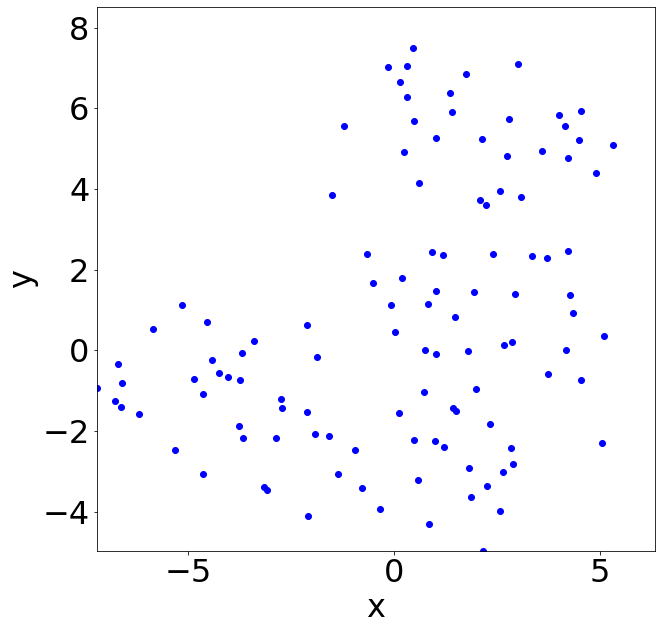

In [29]:
scatter_plot(x_for_tsne, y_for_tsne, 'x', 'y', False)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
def t_sne(x, y, score, xlabel, ylabel):
    size = list(map(lambda x:x*70, score))
    
    minsize = min(size)
    maxsize = max(size)

    tsne_df = pd.DataFrame({'x': x, 'y': y, 'color': score, 'size': size})

    fig, ax = plt.subplots()

    # set before set_style
    sns.set(rc={'figure.figsize':(12,10)})
    sns.set_style("white")

    ax = sns.scatterplot(x = 'x', y = 'y', hue="color", size = "size", data=tsne_df, palette='cool', 
                        sizes=(minsize, maxsize), alpha=0.65, edgecolor="black", linewidth=1, legend = False)
    
    for i, s in enumerate(score):
        ax.annotate(round(s, 2), (x[i], y[i]+0.3), fontsize=10)

    ax.set(xlabel=None, ylabel=None)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, 
                            norm=plt.Normalize(vmin=min(score), vmax=max(score)))

    cbar = fig.colorbar(sm)

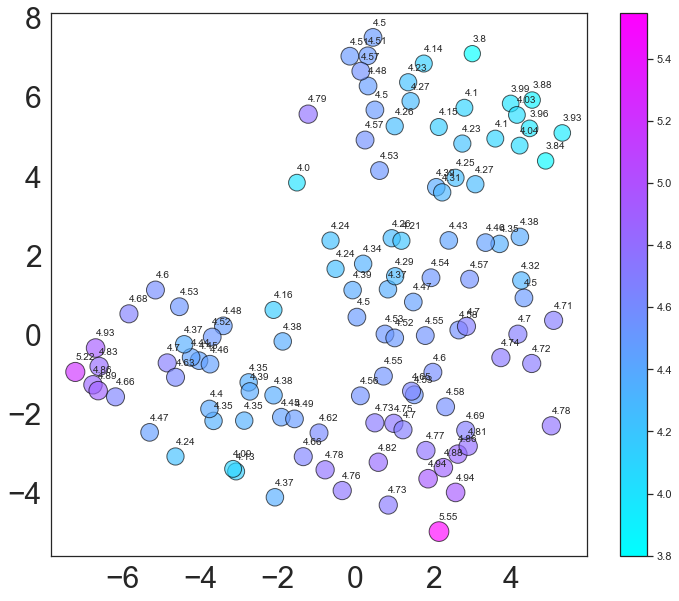

In [105]:
t_sne(x_for_tsne, y_for_tsne, predicted_vals, 'x', 'y')